<a href="https://colab.research.google.com/github/bimapamungkas666/tugas2_text_mining/blob/main/tugas2_text_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 39.3 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=a6fdf3e8a83b1ab257ee803a7bcc9460d54763d928d309702a5375f7bac62fce
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [3]:
import snscrape.modules.twitter as sntwitter
import json
from langdetect import detect

In [4]:
keywords=['Real Madrid']
start="2022–10-14"
end ="2022–10–17"
max_num=10
fname='tweet.json' 
languages=['id','en']

In [5]:
import pandas as pd
datatw=[]

In [6]:
for keyword in keywords:
   
    for i, tweet in enumerate (sntwitter.TwitterSearchScraper(f'{keyword} ').get_items()):
        
        try:
            lan=detect(tweet.content)
        except:
            lan='error'
        if i == max_num:
            break
        if lan in languages:
            data = {'id': tweet.id, 'username':tweet.username, 'date': tweet.date, 'text': tweet.content,'url':tweet.url}
           # print(data)
            datatw.append(tweet.content)
            with open(fname, 'a+', encoding='utf-8') as f:
                line = json.dumps(data, ensure_ascii=False,default=str)
                #print(line)
                f.write(line)
                f.write('\n')

In [7]:
datatw

['Pas kelar foto trus liat hasil fotonya baru sadar "LAH IYA ANYING" https://t.co/ypN1rd6GEC',
 'EL CLASICO ANALYSIS [Real Madrid 3-1 FC Barcelona] ✍️@Hashira_Culer\n\nA THREAD! You Must Read!\n\nDefinitely not an ideal result at the Bernabeu after the mid week disappointment against Inter. Barca missed a few chances and there was a VAR controversy but Real Madrid were superior. https://t.co/jlfOb5P7It',
 "@Steve_LFC19 As a Liverpool fan you shouldn't chat shit about Real Madrid, we've beaten you in TWO recent championships league finals\n\nPipe down",
 'Real Madrid top scorers this season:\n\n• Vinicius - 7 goals\n• Valverde, Rodrygo &amp; Benzema - 5 goals https://t.co/hEeWv9yLix',
 'Real Madrid led the league on points for 7 out of 9 games so far.',
 "@Ashboytm N'hésite pas a t'abonner a notre compte bg."]

In [8]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 28.4 MB/s 


In [9]:
import re
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()# stemming process
# import StopWordRemoverFactory class
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
documents_clean=[]

for d in datatw:
    outputstem= stemmer.stem(d)
    d= stopword.remove(outputstem)
    # Remove Unicode
    document_test = re.sub(r'[^\x00-\x7F]+', ' ', d)
    # Remove Mentions
    document_test = re.sub(r'@\w+', '', document_test)
    # Lowercase the document
    document_test = document_test.lower()
    # Remove punctuations
    document_test = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', document_test)
    # Lowercase the numbers
    document_test = re.sub(r'[0-9]', '', document_test)
    # Remove the doubled space
    outputstop = re.sub(r'\s{2,}', ' ', document_test)
    documents_clean.append(outputstop)

In [10]:
documents_clean[0:5]

['pas kelar foto trus liat hasil foto baru sadar lah iya anying https t co ypnrdgec',
 'el clasico analysis real madrid fc barcelona hashira culer a thread you must read definitely not an ideal result at the bernabeu after the mid week disappointment against inter barca missed a few chances and there was a var controversy but real madrid were superior https t co jlfobpit',
 'steve lfc as a liverpool fan you shouldn t chat shit about real madrid we ve beaten you in two recent championships league finals pipe down',
 'real madrid top scorers this season vinicius goals valverde rodrygo amp benzema goals https t co heewvylix',
 'real madrid led the league on points for out of games so far']

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
tfidfvectorizer = TfidfVectorizer(analyzer='word')
tfidf_wm = tfidfvectorizer.fit_transform(documents_clean)
tfidf_tokens = tfidfvectorizer.get_feature_names()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

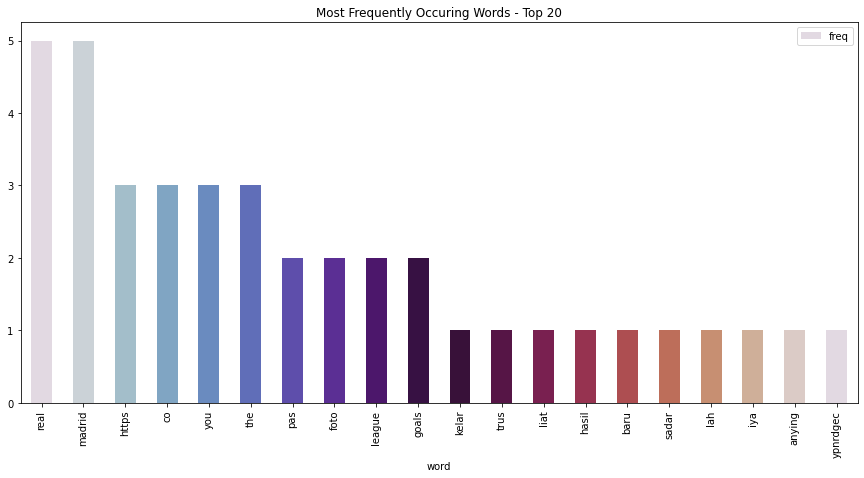

In [12]:
from sklearn.feature_extraction.text import CountVectorizer 
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
cv = CountVectorizer()
words = cv.fit_transform(documents_clean)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20")

In [13]:
from sklearn.cluster import KMeans
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(words)

KMeans(max_iter=100, n_clusters=3, n_init=1)

In [14]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")

Cluster 0:
 pas
 madrid
 goals
 foto
 https
 co
 real
 notre
 of
 on
Cluster 1:
 you
 recent
 league
 pipe
 chat
 real
 championships
 down
 madrid
 liverpool
Cluster 2:
 real
 the
 madrid
 jlfobpit
 bernabeu
 but
 chances
 clasico
 co
 not




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


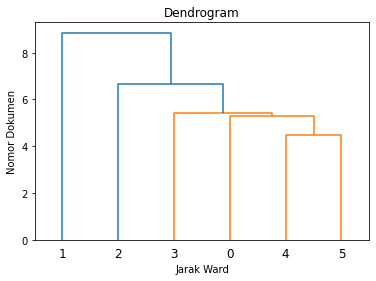

In [15]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward',metric='euclidean'),orientation="top")
plt.title('Dendrogram')
plt.xlabel('Jarak Ward')
plt.ylabel('Nomor Dokumen')
plt.show()

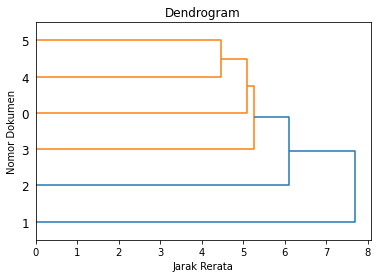

In [16]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
dendrogram = sch.dendrogram(sch.linkage(X, method = 'average',metric='euclidean'),orientation="right")
plt.title('Dendrogram')
plt.xlabel('Jarak Rerata')
plt.ylabel('Nomor Dokumen')
plt.show()